# Project: Wrangle and Analyze Data

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#gathering">Gather Data</a></li>
    <li><a href="#assessing">Assess Data</a></li>
        <li><a href="#assessingsum">Assessing Summary</a></li>
    <li><a href="#cleaning">Clean</a></li>
    <li><a href="#analysis">Data Analysis</a></li>
    <li><a href="#conclusion">Summary and Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In the following project I am going to gather and analyze data all around the Twitter account <a href = "https://twitter.com/dog_rates?lang=de">"WeRateDogs"</a>. For that, data is gathered via manual download, programmatical download and over an API. After that I am going to assess this data, define the issues found during the assessment and clean these issues to get a cleaned master dataframe for analyzing and visualizing the data.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import re
import json
import tweepy

## Gather Data

>1. **Name:** WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)</li>
><ul>   
>    <li><b>Data Source:</b> <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive->enhanced/twitter-archive-enhanced.csv">Udacity</a></li>    
>    <li><b>Method of gathering:</b> Manual download</li>
></ul>

In [2]:
#load twitter_archive
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


>2. **Name:** Tweet image predictions (image_predictions.tsv)</li>
><ul>   
>    <li><b>Source:</b> <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image->predictions.tsv">Udacity</a></li>     
>    <li><b>Method of gathering:</b> Programmatical download via Requests</li>
></ul>

In [10]:
#url for dog breed predictions data from udacity website.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#get response
response = requests.get(url)

with open('image-predictions.tsv',mode = 'wb') as file:
    file.write(response.content)

In [11]:
#load predictions data
df_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


>3. **Name:** Additional Twitter data (tweet_json.txt)
><ul>   
>    <li><b>Source:</b> <a href = "https://twitter.com/dog_rates">WeRateDogs™</a></li>    
>    <li><b>Method of gathering:</b> API via Tweepy</li>
></ul>

In [17]:
#twitter api to get retweets and favorite counts for each tweet

consumer_key = 'xReQiqEQxFOMde7zhNHuPKxfp'
consumer_secret = 'KaRRkGwJRnSCUplg1JRcRaIIEvoseedYNjan0zW1A3pgkpeHyt'
access_token = '1656854544-RfDoZy1wj9R1mBBCKmJItMQ9z1Dppy3ZnCxT8mF'
access_secret = 'Lytlcn1bZE1wwYqxu4cVfpvLcIm4Q7QXFP1KfEakFg7fU'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
#list of tweets to save as txt file and errors list
tweets , err_list = [],[]

for i in df_tweets.tweet_id.unique():
    try:
        tweet = api.get_status(i,tweet_mode = 'extended')
        tweets.append(tweet._json)
    except:
        err_list.append(i)

with open('tweet_json.txt',mode = 'w') as file:
    file.write('\n'.join(json.dumps(tweet) for tweet in tweets))# this will concatenate the tweets into a newline delimited string

In [38]:
# List of dictionaries to build and convert to a DataFrame later
df_list = []

with open('tweet_json.txt',mode = 'r') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            # Append to list of dictionaries
            df_list.append({'tweet_id' : tweet['id'],
                           'retweeted' : tweet['retweeted'],
                           'retweet_count' : tweet['retweet_count'],
                           'favorite_count' : tweet['favorite_count'],
                           'display_text_range' : tweet['display_text_range']})
        except:
            print('error')

In [39]:
#create a data frame from the appended list
df_api = pd.DataFrame(df_list)
df_api.head()

,display_text_range,favorite_count,retweet_count,retweeted,tweet_id
0,"[0, 85]",36313,7729,False,892420643555336193
1,"[0, 138]",31308,5721,False,892177421306343426
2,"[0, 121]",23582,3787,False,891815181378084864
3,"[0, 79]",39623,7890,False,891689557279858688
4,"[0, 138]",37827,8509,False,891327558926688256


## Assess data

In [102]:
(100 * df_tweets.isnull().sum() / df_tweets.shape[0]).sort_values(ascending = False)

in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
retweeted_status_timestamp    92.317487
retweeted_status_user_id      92.317487
retweeted_status_id           92.317487
expanded_urls                  2.504244
timestamp                      0.000000
source                         0.000000
text                           0.000000
puppo                          0.000000
pupper                         0.000000
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
tweet_id                       0.000000
dtype: float64

From the above results, we can observe that:

<ul>
    <li>There are more than 90% missing values in retweeted, reply related columns. But we only need original tweets not        retweets so we can remove these columns in cleaning.</li>
    <li>There are some missing values in expanded_urls also. Let's have a look at those missing rows.</li>
</ul>

In [106]:
df_tweets[df_tweets.expanded_urls.isnull()].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
967,750381685133418496,7.501805e+17,4.717297e+09,2016-07-05 17:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 such a good doggo\n@spaghemily,NaN,NaN,NaN,NaN,13,10,None,doggo,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [40]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are some errenous data types they are:
<ul>
    <li>timestamps is in object. we have to convert to datateime</li>
</ul>    

In [95]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Most of the rating in WeRateDogs follows the 11/10, 12/10, 13/10 ... convention but in the above results ranges of rating_numerator and rating_denominator are telling different so let's have a look at those values.

In [42]:
df_tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### rating_denominator values that are greater than 10

In [108]:
#show the full text
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 4000)

df_tweets[df_tweets.rating_denominator > 10][['text','rating_denominator']]

,text,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


#### Observation :
<ul>
     <li>The rating denominator is high because there are lot of puppers in a single image so they are aggregating the rating    and posting. if this is the case all denominator values should be sums of 10's.</li>
     <li>In some rating denominators there are other than sum of 10's values that is because, In the text they have mentioned      other integers in the same format as ratings but they are not ratings. so our rating_denominator column extracted wrong values.</li>
</ul>

#### rating_denominator values that are less than 10

In [110]:
df_tweets[df_tweets.rating_denominator < 10][['text','rating_denominator']]

,text,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2


These values are also wrongly extracted from the text

In [57]:
df_tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

#### rating_numerator greater than 14.
<ul>
    10,11,12,13,14 are most common values that's why i am looking at the rating_numerator grater than 14.
</ul>

In [111]:
df_tweets[df_tweets.rating_numerator > 14][['text','rating_numerator']]

,text,rating_numerator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
285,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15
290,@markhoppus 182/10,182
291,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24


#### rating_numerator less than 10.

In [114]:
df_tweets[df_tweets.rating_numerator < 10][['text','rating_numerator']].sample(5)

,text,rating_numerator
1646,Here we see a faulty pupper. Might need to replace batteries. Try turning off &amp; back on again. 9/10 would still pet https://t.co/O1E4AtHVxO,9
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9
1673,This is Todo. He's screaming because he doesn't want to wear his sweater or a seat belt. 9/10 gotta buckle up pup https://t.co/Nm8Spw4HbD,9
883,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9


#### Observation :
<ul>
     <li>There are some values in decimals which are wrongly extracted.</li>
     <li>In some texts they have other integers in the same format as ratings which are wrongly extracted.</li>
</ul>

In [72]:
df_tweets.name.value_counts() 

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Penny            10
Tucker           10
Lola             10
Winston           9
Bo                9
the               8
Sadie             8
Bailey            7
Daisy             7
Buddy             7
an                7
Toby              7
Stanley           6
Leo               6
Koda              6
Jax               6
Milo              6
Bella             6
Jack              6
Dave              6
Rusty             6
Scout             6
Oscar             6
Sammy             5
               ... 
Acro              1
Baron             1
Dotsy             1
incredibly        1
Willow            1
Sojourner         1
Puff              1
Duchess           1
Patch             1
Chuq              1
Nugget            1
Snicku            1
Caryl             1
Rilo              1
Ember             1
Monty             1
Aubie             1
Carll             1
Tuck              1


Names seems to have wrong values like a, an,.....

Let's check the words based on the word length to find the words that are not names

In [76]:
df_tweets[df_tweets.name.str.len() <= 2]['name'].value_counts()
#df_tweets[df_tweets.name.str.len() == 3]['name'].value_counts()
#df_tweets[df_tweets.name.str.len() == 4]['name'].value_counts()
#df_tweets[df_tweets.name.str.len() == 5]['name'].value_counts()

a     55
Bo     9
an     7
Al     1
Mo     1
Jo     1
O      1
by     1
Ed     1
JD     1
my     1
Name: name, dtype: int64

Wrong names that I found by using above method : a, an, by, my, one, the, not, old, his, all, very, just, such, this

In [98]:
df_tweets[['doggo','floofer','pupper','puppo']].sample(5)

,doggo,floofer,pupper,puppo
150,None,None,None,None
1360,None,None,pupper,None
1207,None,None,None,None
1883,None,None,None,None
1699,None,None,None,None


Not all tweets are classified as one of the dog stages categories. And create a single column for dog stage variable instead of four.

In [490]:
df_tweets[(df_tweets.doggo == 'doggo') & (df_tweets.pupper == 'pupper')][['doggo','pupper','text']]

,doggo,pupper,text
460,doggo,pupper,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7"
531,doggo,pupper,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
565,doggo,pupper,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze"
575,doggo,pupper,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
705,doggo,pupper,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
733,doggo,pupper,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u"
778,doggo,pupper,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda"
822,doggo,pupper,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
889,doggo,pupper,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll"
956,doggo,pupper,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8


Some tweets are classified as two dog stage categories because of multiple dogs in images. keep this in mind when creating a single column for dog stage cateories

In [125]:
df_tweets.source.sample(5)

512     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
231     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2222    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2263                    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
1231    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

For Analysis, full HTML code would not be good. we can slice the name of the source from string.

In [41]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


All columns are in appropriate data types. But structure of columns are not tidy they are:

 - instead of p1,p2,p3 we can make one column for predictions
 - instead of p1_conf,p2_conf,p3_conf we can make one column for confidence

In [89]:
df_predictions.describe() 

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Check for the duplicate images

In [172]:
df_predictions.jpg_url.duplicated().sum()

66

There are 66 duplicate images that means predictions also have the retweets. these rows will be dropped while joining with the cleaned df_tweets

Check for the images which are not dogs

In [175]:
df_predictions[(df_predictions.p1_dog == False) & (df_predictions.p2_dog == False) & (df_predictions.p3_dog == False)].shape

(324, 12)

There are 324 images which are not dogs

In [118]:
df_predictions.p1.sample(5)

625                             ram
1114    German_short-haired_pointer
2025                     Weimaraner
415                        Pembroke
1214                       malamute
Name: p1, dtype: object

Some words are starting with capital letters some are not. this might give a diiferent results for most popular breed?

In [45]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 5 columns):
display_text_range    2329 non-null object
favorite_count        2329 non-null int64
retweet_count         2329 non-null int64
retweeted             2329 non-null bool
tweet_id              2329 non-null int64
dtypes: bool(1), int64(3), object(1)
memory usage: 75.1+ KB


Not all tweets(2356) in our tweets archive are in our tweets from api(2329)

In [149]:
df_api.sample(5)

,display_text_range,favorite_count,retweet_count,retweeted,tweet_id
268,"[0, 131]",27501,7750,False,839549326359670784
284,"[0, 80]",16125,2370,False,837110210464448512
1903,"[0, 100]",1072,402,False,674038233588723717
853,"[0, 111]",5374,1585,False,761227390836215808
1025,"[0, 115]",3840,1367,False,743210557239623680


display_text_range is stored as two values in a list and data type is object. Since lower range is always 0 we can remove that and convert it to integer.

In [119]:
print(df_tweets.tweet_id.duplicated().sum())
print(df_predictions.tweet_id.duplicated().sum())
print(df_api.tweet_id.duplicated().sum())

0
0
0


No duplicate Ids in the datsets.

<a id = 'assessingsum'></a>
## Assesing Summary

#### Quality
##### `df_tweets` table
- the datatype for the timestamps columns is object and should be datetime
- some of the dogs are not classified as one of dog stage categories("doggo", "floofer", "pupper" or "puppo") and contain all "None" instead
- some of the dog names are not correct (the,one, an, by, a, ...)
- contains retweets
- some of the ratings are not correctly extracted (mostly if there are more than one entries with the same format as rating) 
- some of the ratings are in decimals which are not correctly extracted to save the correct rating we have to convert rating_numerator data type from int to float
- the source column contains html code

##### `df_predictions` table
 - some words are starting with uppercase letters some are lowercase letters. convert everything in the same format
 - some predictions are not dog images
 - there are duplicate images in the data
 
##### `df_api` table
 - display_text_range is stored as two values in a list and data type is object. Since lower range is always 0 we can convert range to integer by removing lowerlimit and change the column name to be appropriate
 
#### Tidiness
##### `df_tweets` table
 - "doggo", "floofer", "pupper" and "puppo" columns should be reduced to one column as dog stage categories.
 
##### `df_predictions` table
 - p1,p2,p3 columns should be reduced to one column as predictions.
 - p1_conf,p2_conf,p3_conf columns should be reduced to one column as confidence.
 
##### `df_api` table
 - Merge this table with the twitter archive because data in the two tables are from same observation unit

<a id = 'cleaning'></a>
## Clean Data
##### Objective : You only want original ratings (no retweets) that have images. Not all are dog ratings and some are retweets.

#### Clean the data with completeness issues
##### df_tweets

 - we have the nulls in the columns about retweets, in_reply and expanded_urls.
 - we only need original tweets not retweets and replies so remove the data rows which have entries in the retweets and in_reply columns and drop these columns.

In [253]:
df_tweets_clean = df_tweets.copy()

In [254]:
#removing the retweets and replies
df_tweets_clean = df_tweets_clean[(df_tweets_clean['in_reply_to_status_id'].isnull()) & (df_tweets_clean['retweeted_status_id'].isnull())]

#drop columns
df_tweets_clean.dropna(axis = 1,how = 'all', inplace = True)

#test
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


retweets are removed and retweet columns were dropped. except expanded_urls all other columns don't have any missing data.

##### df_predictions

 - Don't have any completeness issues but there are images which are not dogs so let's remove those rows 

In [255]:
df_predictions_clean = df_predictions.copy()

#removing the rows which are not the dog images.
df_predictions_clean = df_predictions_clean[~((df_predictions_clean.p1_dog == False) & \
                                            (df_predictions_clean.p2_dog == False) & (df_predictions_clean.p3_dog == False))]

#test
df_predictions_clean[(df_predictions_clean.p1_dog == False) & (df_predictions_clean.p2_dog == False)\
               & (df_predictions_clean.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Now all rows are dog images we can remove the p1_dog,p2_dog,p3_dog columns

In [256]:
df_predictions_clean.drop(['p1_dog','p2_dog','p3_dog'],axis = 1,inplace = True)
df_predictions_clean.shape

(1751, 9)

#### df_api
 - Don't have any completeness issues but this data also contains retweets. while joining with df_tweets_clean this can be resolved.

#### Clean the data with tidiness(structural) issues
 - **`df_tweets`** : "doggo", "floofer", "pupper" and "puppo" columns should be reduced to one column as dog stage categories.


In [257]:
#converting "doggo", "floofer", "pupper" and "puppo" columns to single column as dog stage categories.
def get_dog_stages(df):
    stages = df[['doggo', 'floofer','pupper', 'puppo']].values
    row = ''
    if 'pupper' in stages:
        row = row + 'pupper, ' 
    if 'doggo' in stages:
        row = row + 'doggo, '
    if 'puppo' in stages:
        row = row + 'puppo, '
    if 'floofer' in stages:
        row = row + 'floofer, '
    if row == '':
        return row
    else:
        return row[:-2]

df_tweets_clean['dog_stages'] = df_tweets_clean.apply(get_dog_stages,axis = 1)
df_tweets_clean.drop(['doggo', 'floofer','pupper', 'puppo'],axis = 1,inplace = True)
df_tweets_clean['dog_stages'].value_counts()

                  1761
pupper             221
doggo               72
puppo               23
pupper, doggo        9
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stages, dtype: int64

**`df_predictions`** : 
 - p1,p2,p3 columns should be reduced to one column as predictions 
 - p1_conf,p2_conf,p3_conf columns should be reduced to one column as confidence.

To convert predictions and confidence in tidy format with the same shape as df_predictions we need to choose the algorithm's most likely dog breed prediction. Which means, dropping the p2,p3 and their confidence rates.

In [258]:
df_predictions_clean.drop(['p2', 'p2_conf', 'p3', 'p3_conf'], axis = 1,inplace = True)
df_predictions_clean.rename(columns = {'p1' : 'predicted_breed','p1_conf' : 'confidence'}, inplace = True)
df_predictions_clean.head()

,tweet_id,jpg_url,img_num,predicted_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


**`df_api`** : Merge this table with other tables because all are from same observation unit

df_tweets_clean don't have any retweets and df_predictions_clean only have dog images based on the algorithm predictions. So, by joining the 2 tables we will have only original tweets and dog ratings.

In [259]:
master_df = df_tweets_clean.merge(df_predictions_clean, on = 'tweet_id', how = 'inner')
master_df.shape

(1666, 13)

Merge additional twitter data from df_api

In [260]:
master_df = master_df.merge(df_api, on = 'tweet_id', how = 'inner')
master_df.shape

(1657, 17)

Number of rows are reduced because not all tweets were retrieved from api.

check the retweeted column every row should be False

In [271]:
master_df.retweeted.value_counts()

False    1657
Name: retweeted, dtype: int64

In [272]:
#drop retweeted 
master_df.drop('retweeted',axis = 1, inplace = True)

In [273]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 1656
Data columns (total 16 columns):
tweet_id               1657 non-null int64
timestamp              1657 non-null datetime64[ns]
source                 1657 non-null object
text                   1657 non-null object
expanded_urls          1657 non-null object
rating_numerator       1657 non-null int64
rating_denominator     1657 non-null int64
name                   1657 non-null object
dog_stages             1657 non-null object
jpg_url                1657 non-null object
img_num                1657 non-null int64
predicted_breed        1657 non-null object
confidence             1657 non-null float64
display_text_length    1657 non-null int64
favorite_count         1657 non-null int64
retweet_count          1657 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7), object(7)
memory usage: 220.1+ KB


### Remaining Quality issues

- the datatype for the timestamps columns is object and should be datetime
- some of the dog names are not correct (the,one, an, by, a, ...)
- some of the ratings are not correctly extracted (mostly if there are more than one entries with the same format as rating) 
- some of the ratings are in decimals which are not correctly extracted to save the correct rating we have to convert rating_numerator data type from int to float
- the source column contains html code
- some names in predicted_breed are starting with uppercase letters some are lowercase letters. convert everything in the same format
- display_text_range is stored as two values in a list and data type is object. Since lower range is always 0 we can convert range to integer by removing lowerlimit and change the column name to be appropriate

In [264]:
#convert timestamp to datetime
master_df.timestamp = pd.to_datetime(master_df.timestamp)

In [492]:
#test
master_df.timestamp.head(2)

0   2017-08-01 00:17:27
1   2017-07-31 00:18:03
Name: timestamp, dtype: datetime64[ns]

In [267]:
#convert everyting in same format(to lower case) in predicted_breed
master_df.predicted_breed = master_df.predicted_breed.str.lower()

In [493]:
#test
master_df.predicted_breed.sample(5)

405     golden_retriever
1076            pembroke
395             cardigan
263       border_terrier
863            chihuahua
Name: predicted_breed, dtype: object

In [274]:
#convert display_text_range
master_df.display_text_range = master_df.display_text_range.apply(lambda x : x[1])
master_df.rename(columns = {'display_text_range' : 'display_text_length'},inplace = True)
master_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'jpg_url', 'img_num', 'predicted_breed', 'confidence',
       'display_text_length', 'favorite_count', 'retweet_count'],
      dtype='object')

In [494]:
#test
master_df.display_text_length.head(2)

0    138
1    121
Name: display_text_length, dtype: int64

In [280]:
#replace the wrong dog names with None
wrong_names = ['a', 'an', 'by', 'my', 'one', 'the', 'not', 'old', 'his', 'all', 'very', 'just', 'such', 'this']

master_df['name'] = master_df['name'].apply(lambda x : x if x not in wrong_names else 'None')

In [495]:
#test
master_df[master_df['name'].isin(wrong_names)]['name']

Series([], Name: name, dtype: object)

In [288]:
#extract source from html code
master_df['source'] = master_df.source.str.split('T').apply(lambda x : 'T' + x[1][:-4])
#test
master_df.source.value_counts()

Twitter for iPhone    1627
Twitter Web Client      22
TweetDeck                8
Name: source, dtype: int64

In [375]:
def extract_numerator(data):
    if len(data) == 2:
        if int(data[0][0].split('/')[1])%10 == 0:
            return float(data[0][0].split('/')[0])
        else:
            return float(data[1][0].split('/')[0])
    else:
        return float(data[0][0].split('/')[0])

In [363]:
def extract_denominator(data):

    if len(data) == 2:
        if int(data[0][0].split('/')[1])%10 == 0:
            return int(data[0][0].split('/')[1])
        else:
            return int(data[1][0].split('/')[1])
    else:
        return int(data[0][0].split('/')[1])

if all denominator values are divisible by 10 then we are extracting the right values

In [368]:
denom_rough = master_df.text.apply(lambda x : re.findall("(\d+(\.\d+)?\/\d+(\.\d+)?)",x)).apply(extract_denominator)
#test
denom_rough.value_counts()

10     1644
50        3
80        2
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
Name: text, dtype: int64

One value is 7 which is not possible for the rating denominator according to WeRateDogs rating system. Let's check the text of that tweet

In [369]:
mask = denom_rough.values == 7
pd.Series(denom_rough.values[mask], denom_rough.index[mask])

341    7
dtype: int64

In [367]:
master_df.iloc[341,:]['text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

There is no rating in the text we can drop this row

In [372]:
master_df.drop(341,axis = 0,inplace = True)

In [376]:
#extract ratings from text
master_df.rating_denominator = \
master_df.text.apply(lambda x : re.findall("(\d+(\.\d+)?\/\d+(\.\d+)?)",x)).apply(extract_denominator)

master_df.rating_numerator = \
master_df.text.apply(lambda x : re.findall("(\d+(\.\d+)?\/\d+(\.\d+)?)",x)).apply(extract_numerator)
#test
master_df.rating_denominator.value_counts()

10     1644
50        3
80        2
150       1
120       1
110       1
90        1
70        1
40        1
20        1
Name: rating_denominator, dtype: int64

All values in the rating_denominator are divisible by 10 

In [377]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 1656
Data columns (total 16 columns):
tweet_id               1656 non-null int64
timestamp              1656 non-null datetime64[ns]
source                 1656 non-null object
text                   1656 non-null object
expanded_urls          1656 non-null object
rating_numerator       1656 non-null float64
rating_denominator     1656 non-null int64
name                   1656 non-null object
dog_stages             1656 non-null object
jpg_url                1656 non-null object
img_num                1656 non-null int64
predicted_breed        1656 non-null object
confidence             1656 non-null float64
display_text_length    1656 non-null int64
favorite_count         1656 non-null int64
retweet_count          1656 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 219.9+ KB


All data types are appropriate and no missing information.

In [496]:
master_df.to_csv('twitter_archive_master.csv',index = False)

<a id='analysis'></a>
## Data Analysis

**Questions**

1. Which dog breed has more posts overall and each year?
2. Which dog breed has most favorite count in a single post overall and each year?
3. Is there any pattern between month of the year and number of posts?

Which dog breed has more posts overall and each year?

In [471]:
#create a year column for viz
master_df['year'] = master_df.timestamp.dt.year

In [449]:
def dog_breed_viz_data(data,columns,agg):
    
    period = ['All time','2017','2016','2015']

    y_var = []
    breed = []

    #get values based on the aggregate function for all time and each year
    all_time = data.groupby('predicted_breed')[columns].agg(agg).sort_values(ascending = False).reset_index().head(1)
    y_var.append(all_time[columns].values[0])
    breed.append(all_time['predicted_breed'].values[0])

    for year in data.year.unique():
        year = data[master_df.year == year].groupby('predicted_breed')[columns]\
                                                .agg(agg).sort_values(ascending = False).reset_index().head(1)
        y_var.append(year[columns].values[0])
        breed.append(year['predicted_breed'].values[0])


    viz = pd.DataFrame({'Period' : period,'y_variable' : y_var, 'breed' : breed})
    
    return viz

In [463]:
def dog_breed_plot(data,y_lower,y_upper,ylabel,title,y_bar_placement = 3):
    
    plt.figure(figsize=(8,6))
    g = sb.barplot(data = data, x = 'Period', y = 'y_variable',color=sb.color_palette()[0])
    bar_x = [0,1,2,3]
    for index,row in data.iterrows():
        g.text(bar_x[index],row['y_variable'] + y_bar_placement, row['breed'], color='black', ha="center",fontsize = 12)
    plt.ylim(y_lower,y_upper)
    plt.ylabel(ylabel,fontsize = 12)
    plt.xlabel('Period',fontsize = 12)
    plt.title(title,fontsize = 16);

In [453]:
viz1 = dog_breed_viz_data(master_df,'tweet_id','size')
viz1.head()

,Period,y_variable,breed
0,All time,136,golden_retriever
1,2017,31,golden_retriever
2,2016,80,golden_retriever
3,2015,35,chihuahua


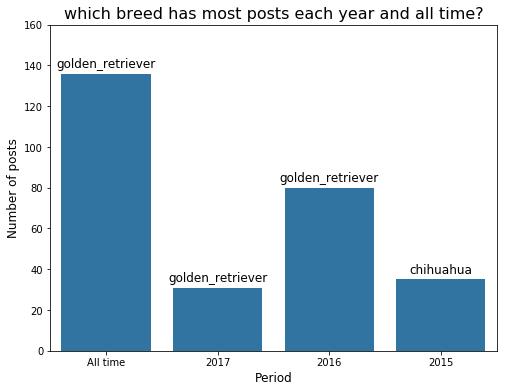

In [470]:
dog_breed_plot(viz1,0,160,'Number of posts','which breed has most posts each year and all time?')

Which dog breed has most favorite count overall and each year?

In [456]:
viz2 = dog_breed_viz_data(master_df,'favorite_count','max')
viz2.head()

,Period,y_variable,breed
0,All time,156751,labrador_retriever
1,2017,133496,lakeland_terrier
2,2016,156751,labrador_retriever
3,2015,78593,swing


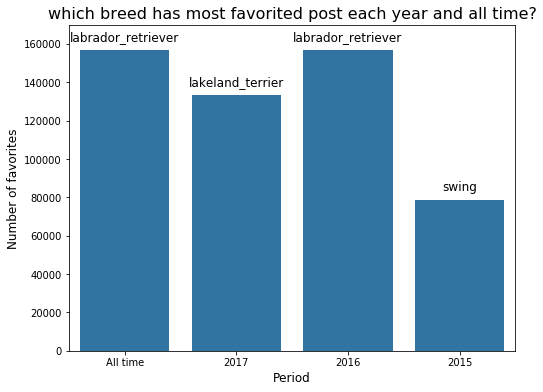

In [469]:
dog_breed_plot(viz2,0,170000,'Number of favorites','which breed has most favorited post each year and all time?',5000)

Is there any pattern between month of the year and number of posts?

In [473]:
#creating a months column
master_df['months'] = master_df.timestamp.dt.month

In [486]:
def plot_trends(column,agg,ylabel,title):
    
    colors = ['skyblue','olive','red']
    plt.figure(figsize=(20,10))
    for year,color in zip(master_df.year.unique(),colors):
        data = master_df[master_df.year == year].copy()
        grouped_data = data.groupby('months')[column].agg(agg)
        sb.lineplot(grouped_data.index, grouped_data.values,color = color,label = str(year),ci = 0)

    plt.xlabel('Months',fontsize = 20)
    plt.ylabel(ylabel,fontsize = 20)
    plt.title(title,fontsize = 16)
    plt.legend(prop={'size': 20})
    plt.show()

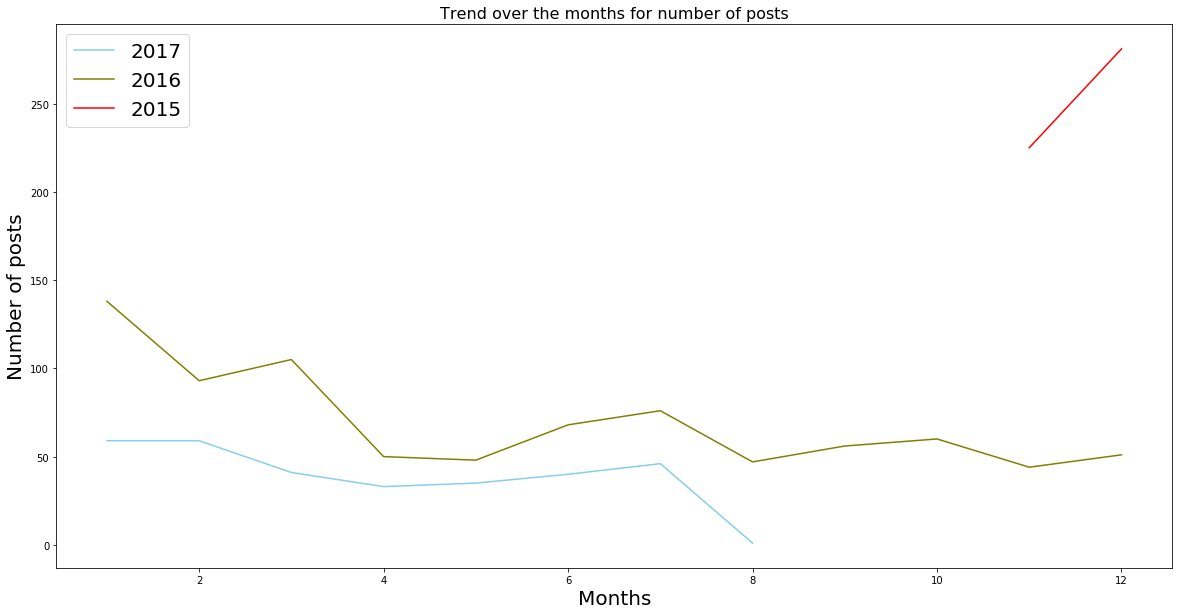

In [487]:
plot_trends('tweet_id','size','Number of posts','Trend over the months for number of posts')

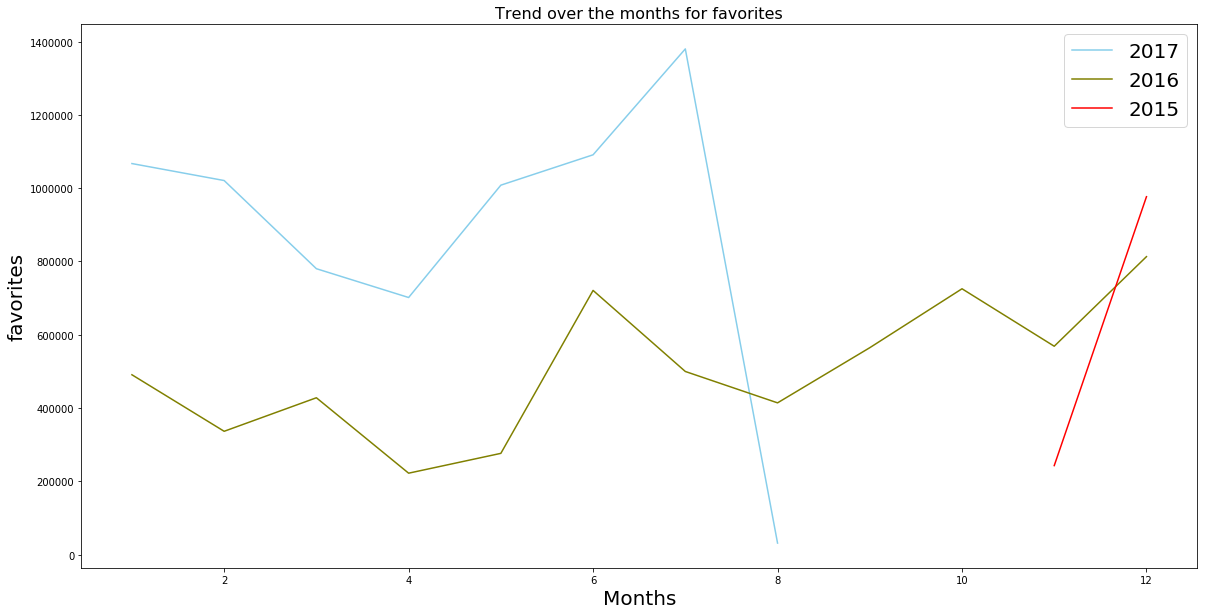

In [488]:
plot_trends('favorite_count','sum','favorites','Trend over the months for favorites')

Since the account was lauched in November 2015 number of tweets were very high in 2015. For proper analysis we should not consider 2015 to find patterns because we don't have enough data in 2015 and launching buzz will not stay forever so let's compare 2016 and 2017. Both 2016 and 2017 have the simillar trend line over the months in number of posts and favorites. But number of posts were higher in 2016 for every month than 2017, while the favorites were higher for every month in 2017 than 2016.

<a id='conclusion'></a>
## Summary and Conclusions

In this project we went through a whole data wrangling process. The gathering included the programmatical, manual download as also the gathering via an API. Also the cleaning part covered a lot of techniques like regular expressions or the overall handling of dataframes. 

In the analysis we took a look at following questions: 

**Questions:**

<ol>
    <li>Based on the predicted, most likely dog breed: Which breed has more posts overall and each year?</li>
    Overall The winner for our analysis was the golden retriever. In 2015, it was chihuauha. After that both in 2016 and 2017 it was golden retriever.
    <li>Which dog breed has most favorite count and overall and each year?</li> 
    All time most favorited post was labrador retriever it was posted in 2016. In 2015 most favorited post was swing and in 2017 it was lakeland_terrier.
    <li>Is there any pattern between month of the year with the number of posts and favorites?</li> 
    Since the account was lauched in November 2015 number of tweets were very high in 2015. For proper analysis we should not consider 2015 to find patterns because we don't have enough data in 2015 and launching buzz will not stay forever so let's compare 2016 and 2017. Both 2016 and 2017 have the simillar trend line over the months in number of posts and favorites. But number of posts were higher in 2016 for every month than 2017, while the favorites were higher for every month in 2017 than 2016.
</ol>